<a href="https://colab.research.google.com/github/JacksonReber/BuildWeek/blob/master/Jackson_Reber_Build_Week_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
!pip install category_encoders==2.*
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D
from xgboost import XGBRegressor
from matplotlib import pyplot


     |████████████████████████████████| 80 kB 3.8 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**READING IN THE DATA AND PASSING IT THROUGH A WRANGLE FUNCTION**
I kept some feature columns here for visualization that I will later drop to build models

In [ ]:
#Reading in 'df_vis' because I am using this only for visual exploration of the data. I will drop and feature engineer columns once I start to build models
df_vis = pd.read_csv('StudentsPerformance.csv')
def wrangle(df_vis):
  df_vis['Average_Test_Scores'] = df_vis[['math score', 'reading score', 'writing score']].mean(axis=1)
  #df.drop(['math score', 'writing score', 'reading score'],axis = 1, inplace=True)
  #df = pd.get_dummies(df)
  
  return df_vis
df_vis = wrangle(df_vis)

In [ ]:
df_vis.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average_Test_Scores
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
df_vis.groupby(['race/ethnicity','parental level of education']).mean()

math score  ...  Average_Test_Scores
race/ethnicity parental level of education              ...                     
group A        associate's degree            61.000000  ...            63.880952
               bachelor's degree             67.166667  ...            67.861111
               high school                   60.444444  ...            61.277778
               master's degree               57.666667  ...            63.333333
               some college                  63.888889  ...            64.888889
               some high school              58.916667  ...            59.861111
group B        associate's degree            66.097561  ...            67.975610
               bachelor's degree             69.300000  ...            71.300000
               high school                   59.791667  ...            61.500000
               master's degree               67.166667  ...            74.833333
               some college                  63.189189  ...            64.378378
               some high school              61.815789  ...            64.289474
group C        associate's degree            66.730769  ...            69.376068
               bachelor's degree             68.150000  ...            73.241667
               high school                   60.906250  ...            62.328125
               master's degree               67.052632  ...            69.035088
               some college                  65.130435  ...            67.806763
               some high school              60.551020  ...            63.156463
group D        associate's degree            67.600000  ...            69.333333
               bachelor's degree             67.571429  ...            69.869048
               high school                   62.863636  ...            63.477273
               master's degree               72.521739  ...            76.478261
               some college                  68.731343  ...            70.437811
               some high school              66.760000  ...            68.613333
group E        associate's degree            74.897436  ...            73.974359
               bachelor's degree             76.555556  ...            75.592593
               high school                   70.772727  ...            69.545455
               master's degree               74.625000  ...            79.083333
               some college                  73.828571  ...            72.219048
               some high school              72.111111  ...            69.407407

[30 rows x 4 columns]

**Visual Exploration**

*Visual Exploration of Parental Level of Education*

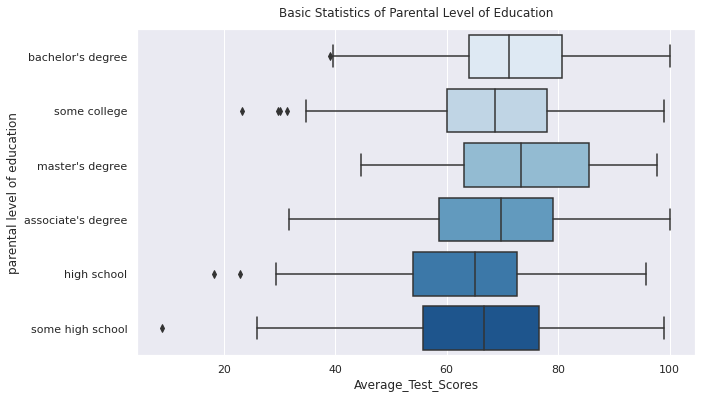

In [ ]:
#Comparing parental level of education to average test scores
fig, ax = plt.subplots(figsize = (10,6))
sns.set_palette("Blues")

g = sns.boxplot(x = "Average_Test_Scores", y = "parental level of education", data = df_vis)
g.set_title("Basic Statistics of Parental Level of Education",y = 1.02)
plt.show()

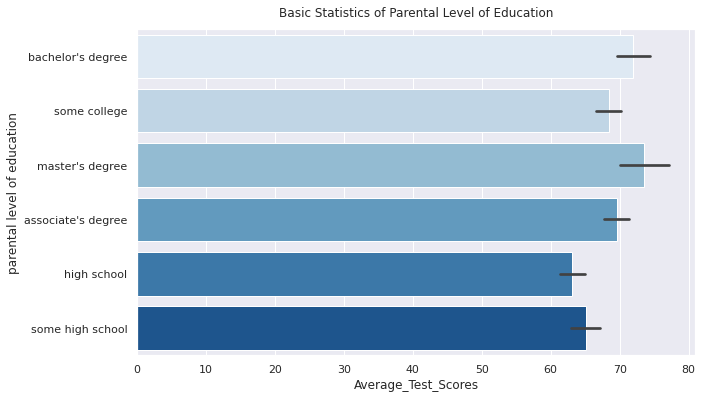

In [ ]:
##Comparing parental level of education to average test scores

fig, ax = plt.subplots(figsize = (10,6))
sns.set_palette("Blues")
g1 = sns.barplot(x = "Average_Test_Scores", y = "parental level of education", data = df_vis)
g1.set_title("Basic Statistics of Parental Level of Education",y = 1.02)
plt.show()

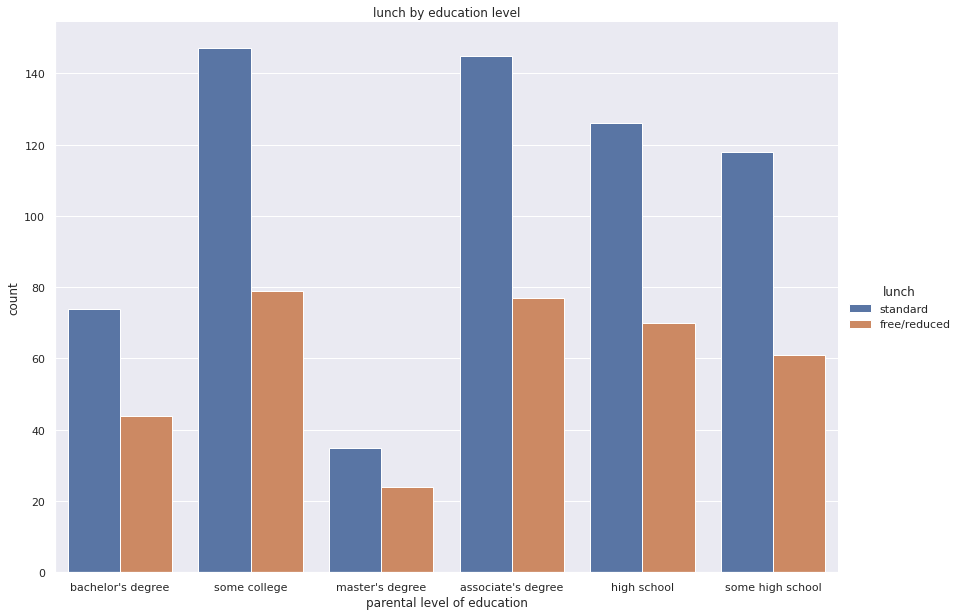

In [ ]:
#Comparing parental level of education to whether a student is on free and reduced lunch or not

sns.set_theme(style="darkgrid")
sns.catplot(x='parental level of education',hue='lunch',data=df_vis,kind='count', height=8.27, aspect=11.7/8.27)
plt.title('lunch by education level')
plt.show()

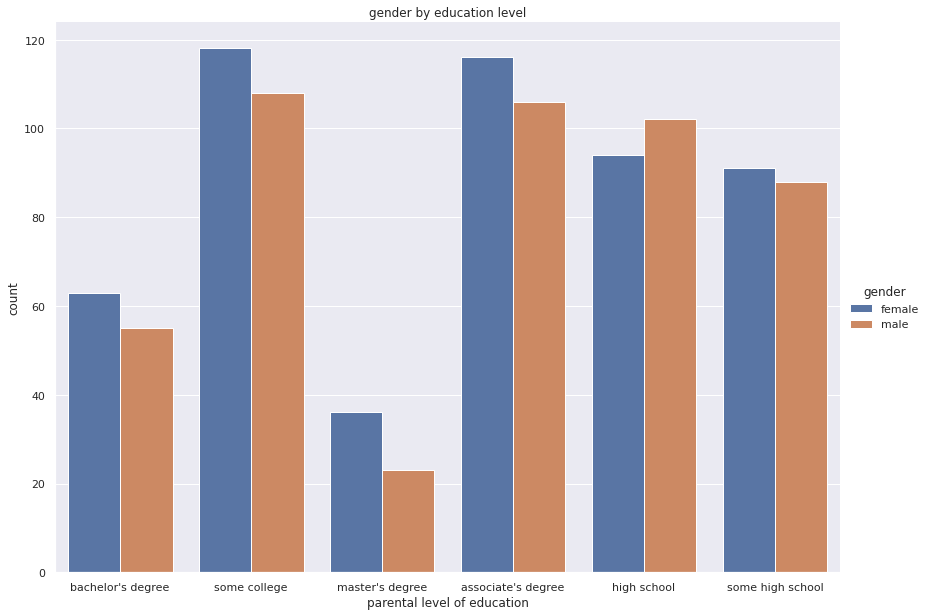

In [ ]:
#Comparing parental level of education to gender
#We see that on average, females parents tend to have a higher level of education
sns.set_theme(style="darkgrid")
sns.catplot(x='parental level of education',hue='gender',data=df_vis,kind='count', height=8.27, aspect=11.7/8.27)
plt.title('gender by education level')
plt.show()

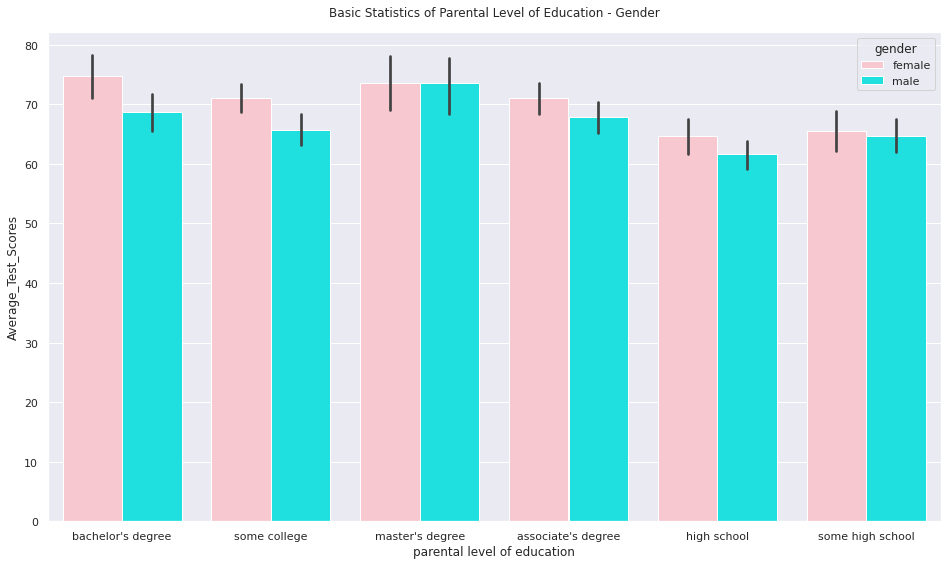

In [ ]:
#Comparing parental level of education to gender and average test scores
#We see that on average females perform better on tests regardless of their parents level of education
fig,ax = plt.subplots(figsize = (16, 9))
sns.set_palette(["pink","cyan"])
g2 = sns.barplot(y = "Average_Test_Scores", 
            x = "parental level of education", 
            hue = "gender",
            data = df_vis)
g2.set_title("Basic Statistics of Parental Level of Education - Gender",y = 1.02)
plt.show()

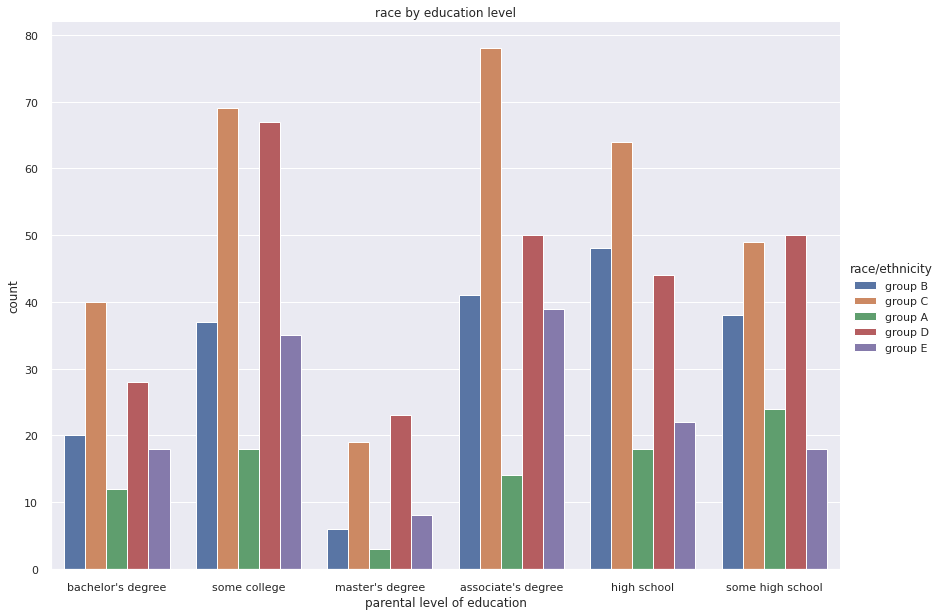

In [ ]:
#Comparing parental level of education to race

sns.catplot(x='parental level of education',hue='race/ethnicity',data=df_vis,kind='count', height=8.27, aspect=11.7/8.27)
plt.title('race by education level')
plt.show()

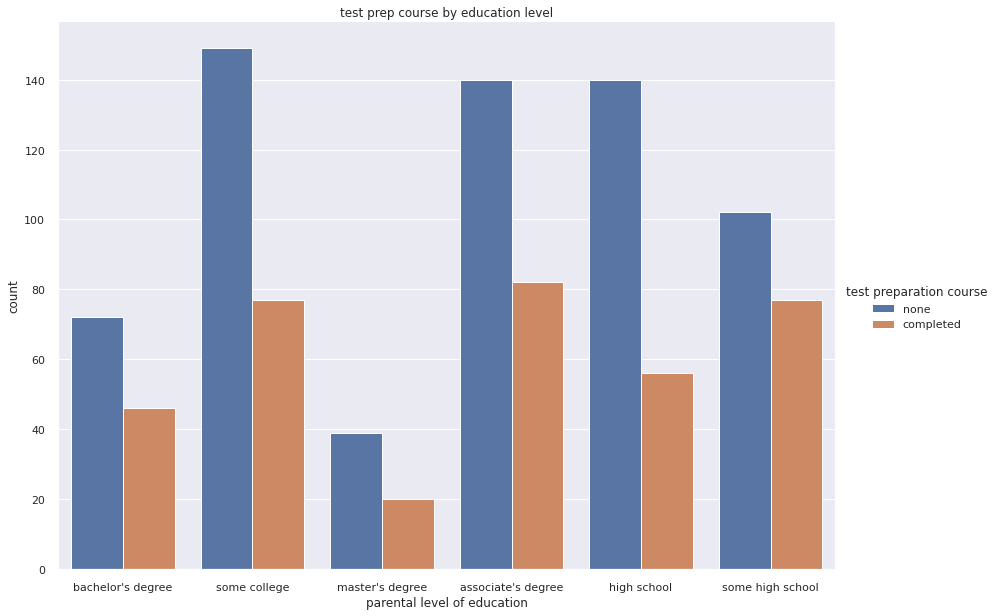

In [ ]:
#Comparing parental level of education to whether or not the student is on free and reduced lunch

sns.set_theme(style="darkgrid")
sns.catplot(x='parental level of education',hue='test preparation course',data=df_vis,kind='count', height=8.27, aspect=11.7/8.27)
plt.title('test prep course by education level')
plt.show()

*Visual Exploration of Gender*

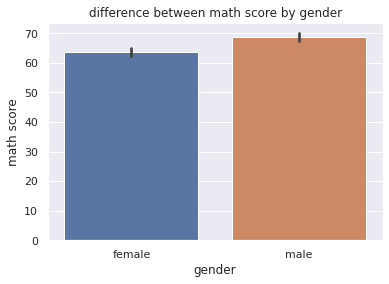

In [ ]:
#Comparing gender to math test scores

sns.barplot(x='gender',y='math score',data=df_vis)
plt.title('difference between math score by gender')
plt.show()

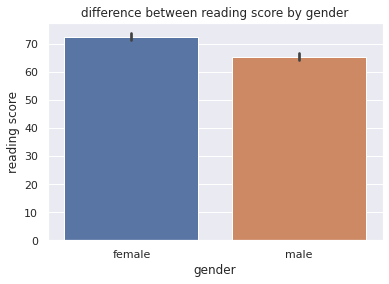

In [ ]:
#Comparing gender to reading test scores
sns.barplot(x='gender',y='reading score',data=df_vis)
plt.title('difference between reading score by gender')
plt.show()

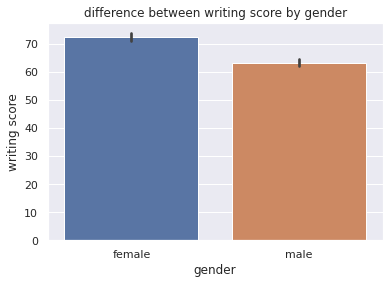

In [ ]:
#Comparing gender to writing test scores
sns.barplot(x='gender',y='writing score',data=df_vis)
plt.title('difference between writing score by gender')
plt.show()

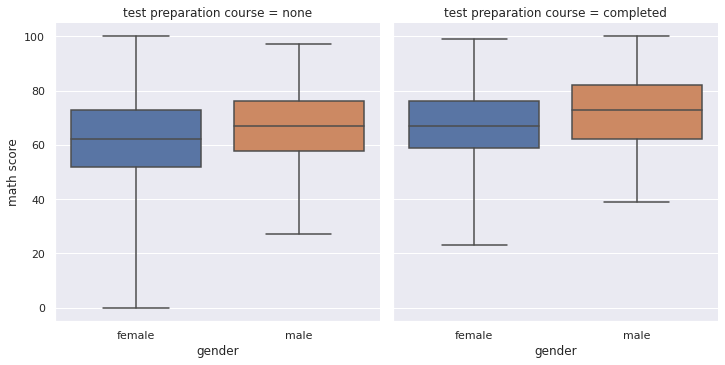

In [ ]:
#Comparing gender to math test scores with test preparation courses
#Males perform better on average than females on math tests when they have taken a test prep course
sns.catplot(x='gender',y='math score',data=df_vis,kind='box',col='test preparation course', whis=[0,100])
plt.show()

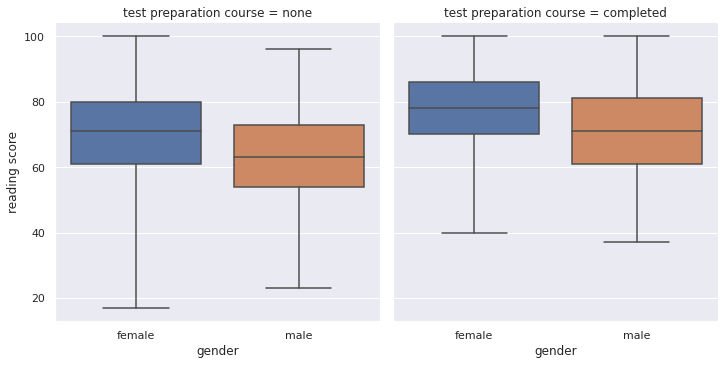

In [ ]:
#Comparing gender to reading test scores with test preparation courses
#Females perform better on average on reading test scores whether they have or have not completed a test prep course
sns.catplot(x='gender',y='reading score',data=df_vis,kind='box',col='test preparation course', whis=[0,100])
plt.show()

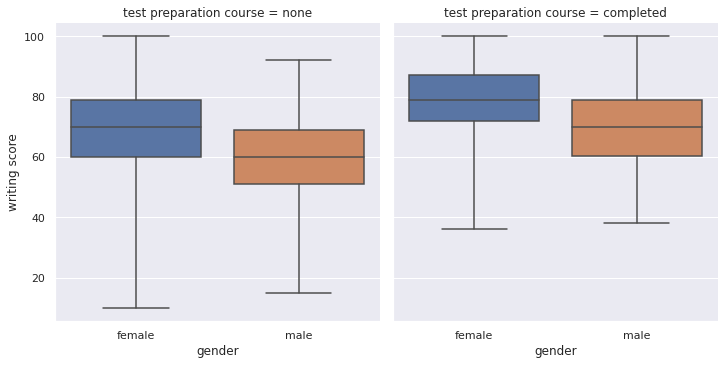

In [ ]:
#Comparing gender to writing test scores with test preparation courses
#Females perform better on average on writing test scores whether they have or have not completed a test prep course
sns.catplot(x='gender',y='writing score',data=df_vis,kind='box',col='test preparation course', whis=[0,100])
plt.show()

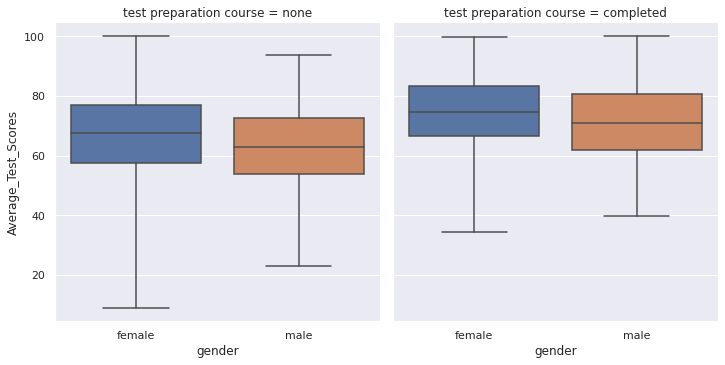

In [ ]:
#Comparing gender to average test scores with test preparation courses
#Females have better average test scores regardless of whether they took a test prep course or not
sns.catplot(x='gender',y='Average_Test_Scores',data=df_vis,kind='box',col='test preparation course', whis=[0,100])
plt.show()

*Visual Exploration of Lunch*

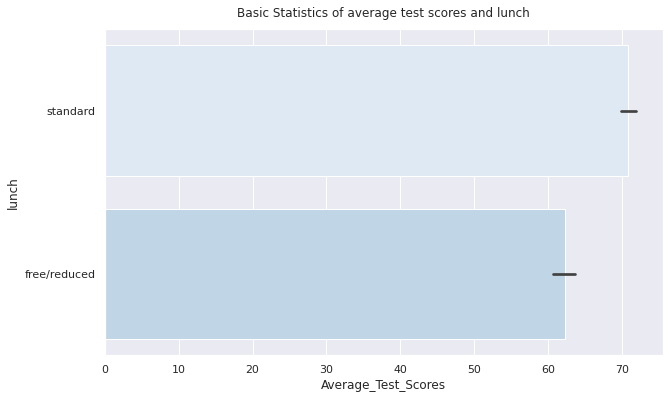

In [ ]:
#Comparing average test scores to lunch 
#As we can see, the students average test scores are lower when they are on free/reduced lunch
fig, ax = plt.subplots(figsize = (10,6))
sns.set_palette("Blues")
g3 = sns.barplot(x = "Average_Test_Scores", y = "lunch", data = df_vis)
g3.set_title("Basic Statistics of average test scores and lunch",y = 1.02)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


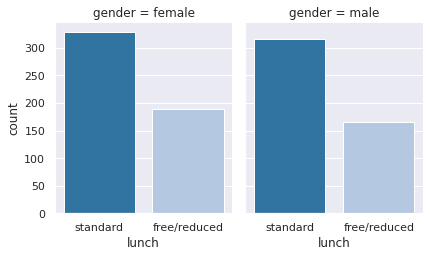

In [ ]:
#Visualizing the distribution of lunch and gender
#As we can see, on average females have a higher count of free and reduced lunch
g4 = sns.catplot("lunch", col="gender", col_wrap=4,
                data=df_vis,
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')

fig.suptitle('sf')
plt.show()

**BEGINNING TO BUILD MODELS AND WRANGLING DATA**

In [ ]:
#Reading in the data set again so I can use this wrangle function and prepare my data to be fit to models
df = pd.read_csv('StudentsPerformance.csv')
def wrangle(df):
  df['Average_Test_Scores'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
  df.drop(['math score', 'writing score', 'reading score'],axis = 1, inplace=True)
  df = pd.get_dummies(df)
  
  return df
df = wrangle(df)

In [ ]:
df.head()

,Average_Test_Scores,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72.666667,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,82.333333,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,92.666667,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,49.333333,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76.333333,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


**SEPERATING IN TO TRAINING AND TESTING SETS**

In [ ]:
#My target is 'Average_test_scores'
X=df.drop('Average_Test_Scores',axis=1)
y=df['Average_Test_Scores']

In [ ]:
#Train test split at 20%
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [ ]:
y_train.head()

62     59.333333
580    91.333333
960    59.333333
672    74.333333
452    72.000000
Name: Average_Test_Scores, dtype: float64

**ESTABLISHING A BASELINE**

In [ ]:
#Finding the baseline prediction
y_pred = [y_train.mean()]*len(y_train)
print(y_pred)

[67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333333335, 67.70583333

**LINEAR REGRESSION MODEL**

In [ ]:
# Training Model
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Generating predictions for my Linear Regression model on the training set
y_pred_train=model.predict(X_train)

In [ ]:
#Generating predictions for my Linear Regression model on the test set
y_pred_test=model.predict(X_test)

**MEASURING LINEAR REGRESSION MODEL PERFORMANCE USING RMSE**

In [ ]:
#RMSE for the test set
mean_squared_error(y_test,y_pred_test)


153.17180121527778

In [ ]:
#RMSE for the training set
mean_squared_error(y_train,y_pred_train)

154.81754937065972

In [ ]:
#Getting the R2 score for my linear regression model on the training set
model.score(X_train,y_train)

0.23876132054598598

In [ ]:
#Getting the R2 score for my linear regression model on the test set
model.score(X_test,y_test)

0.2103293207985779

**RANDOM FOREST REGRESSOR**

In [ ]:
#Creating a Random Forest Regressor
model_rf=RandomForestRegressor(n_estimators=1000,max_depth=20)
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#Generating predictions for my Random Forest Regressor model
y_pred_test_rf=model_rf.predict(X_test)
y_pred_train_rf=model_rf.predict(X_train)

**MEASURING RANDOM FOREST REGRESSOR MODEL PERFORMANCE USING RMSE**

In [ ]:
#RMSE for the test set for the Random Forest Regressor
mean_squared_error(y_test,y_pred_test_rf)

197.07786205075988

In [ ]:
#RMSE for the training set for the Random Forest Regressor
mean_squared_error(y_train,y_pred_train_rf)

123.13270847539422

In [ ]:
#Getting the R2 score for my Random Forest Regressor model on the training set
model_rf.score(X_train,y_train)

0.4067780362716774

In [ ]:
#Getting the R2 score for my Random Forest Regressor model on the test set
model_rf.score(X_test,y_test)

-0.06862936335626402

**DOING A RANDOMIZED SEARCH TO FIND THE BEST HYPER PERAMETERS FOR MY RANDOM FOREST REGRESSOR MODEL**

In [ ]:
#Using hyperparameter tuning to improve the performance of my Random Forest model
params={'n_estimators':[350, 400, 450, 500, 550],'max_depth':[10,20,30,50,100]}

model_rf=RandomForestRegressor()
random_search=RandomizedSearchCV(model_rf,param_distributions=params,cv=5)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
#Finding the best parameters for my model
random_search.best_params_

{'max_depth': 10, 'n_estimators': 550}

In [ ]:

random_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=550, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#Applying the best perameters to my Random Forest Regressor Model
model_best=RandomForestRegressor(max_depth=10, n_estimators=550)
model_best.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=550, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**MEASURING RANDOM FOREST REGRESSOR MODEL PERFORMANCE (WITH BEST PARAMS) USING RMSE**


In [ ]:
#Generating predictions for my Random Forest Regressor with the best perameters on the test set
y_pred_test_best=model_best.predict(X_test)

In [ ]:
##Generating predictions for my Random Forest Regressor with the best perameters on the training set
y_pred_train_best=model_best.predict(X_train)

In [ ]:
#Getting the RMSE for my best Random Forest Regressor on the test set
mean_squared_error(y_test,y_pred_test_best)

190.77779667215015

In [ ]:
#Getting the RMSE for my best Random Forest Regressor on the training set
mean_squared_error(y_train,y_pred_train_best)

123.93180693609196

In [ ]:
#Getting the r2 score for my best Random Forest Regressor on the training set
model_best.score(X_train,y_train)

0.40292818383249296

In [ ]:
#Getting the r2 score for my best Random Forest Regressor on the test set
model_best.score(X_test,y_test)

-0.03446806901000943

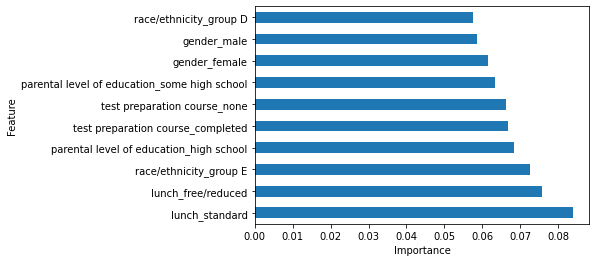

In [ ]:
#Looking at feature importances
importances = model_best.feature_importances_
features = X_train.columns
feature_importances = pd.Series(importances, index=features).sort_values(ascending=False)
feature_importances.head(10).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature');

**RIDGE REGRESSION MODEL**

In [ ]:
#Trying out a ridge regression model
model_ridge = Ridge()
model_ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

**MEASURING RIDGE REGRESSION MODEL PERFORMANCE USING RMSE**

In [ ]:
y_pred_train_ridge=model_ridge.predict(X_train)

In [ ]:
y_pred_test_ridge=model_ridge.predict(X_test)

In [ ]:
#MSE for ridge regression model on the test set

mean_squared_error(y_test,y_pred_test_ridge)

145.2364427555441

In [ ]:
#MSE for ridge regression model on the training set
mean_squared_error(y_train,y_pred_train_ridge)

156.68752296408948

In [ ]:
#r2 score for ridge regression model on the training set
model_ridge.score(X_train,y_train)

0.245119503863929

In [ ]:
#r2 score for ridge regression model on the test set
model_ridge.score(X_test,y_test)

0.22705181833140142

**XGBOOST MODEL**

In [ ]:
#Fitting my data to an XGB Regressor model
model_xgboost=XGBRegressor()
model_xgboost.fit(X_train,y_train)

[15:03:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

**MEASURING XGBoost MODEL PERFORMANCE USING RMSE**

In [ ]:
y_pred_train_xg=model_xgboost.predict(X_train)

In [ ]:
y_pred_test_xg=model_xgboost.predict(X_test)

In [ ]:
#Finding the RMSE for my XGBoost model for the test set
mean_squared_error(y_test,y_pred_test_xg)

151.66108949617276

In [ ]:
##Getting the r2 score for my XGBoost model on the test set

model_xgboost.score(X_test,y_test)

0.17763724536209224

In [ ]:
#Finding the RMSE for my XGBoost model for the training set
mean_squared_error(y_train,y_pred_train_xg)

146.35270248156223

In [ ]:
#Getting the r2 score for my XGBoost model on the training set
model_xgboost.score(X_train,y_train)

0.2949100313146399

Not getting great results with average test scores as my target

**USING WRITING SCORE AS MY TARGET**

[]

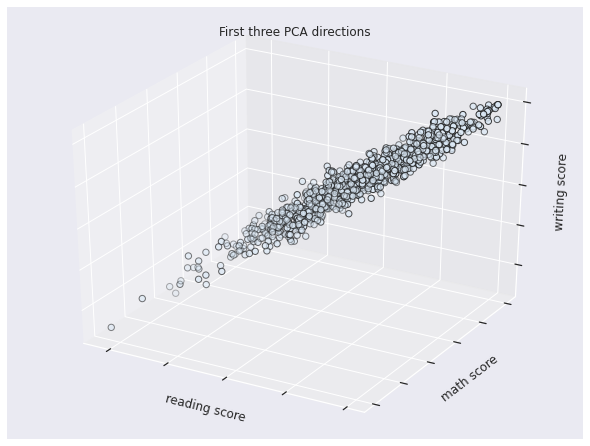

In [ ]:
#After looking at the visualization below, I realized that to build a good model with this data set, I needed to use one of the test scores as my target. 
#I did this because it would give me more columns to work with and more numerical columns to work with
fig = plt.figure(1, figsize=(8, 6))

ax = Axes3D(fig)
principalDF= pd.DataFrame(data=df_full,columns=['writing score','reading score','math score'])


ax.scatter(df_full['reading score'],df_full['math score'],df_full['writing score'], edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("reading score")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("math score")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("writing score")
ax.w_zaxis.set_ticklabels([])

In [ ]:
#Reading in the data set again under a different name to see if this new target will yeild better results
df_full = pd.read_csv('StudentsPerformance.csv')

In [ ]:
#using get dummies to split my catagorical columns to numeric
df_full = pd.get_dummies(df_full)

In [ ]:
#using Writing Score as my target
X2=df_full.drop('writing score',axis=1)
y2=df_full['writing score']

In [ ]:
#train test split
X_train2,X_test2,y_train2,y_test2= train_test_split(X2,y2,test_size=0.2)

In [ ]:
y_pred2 = [y_train2.mean()]*len(y_train2)
print(y_pred2)

[67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59, 67.59

In [ ]:
#fitting an XGB Regressor to my new target
model_xgboost2=XGBRegressor()
model_xgboost2.fit(X_train2,y_train2)

[15:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
#Getting the results of my model
y_pred_train_xg2=model_xgboost2.predict(X_train2)

In [ ]:
#Getting the results of my model

y_pred_test_xg2=model_xgboost2.predict(X_test2)

In [ ]:
#MSE for the test set

mean_squared_error(y_test2,y_pred_test_xg2)

15.365517287170805

In [ ]:
#r2 score for the test set
model_xgboost2.score(X_test2,y_test2)

0.938825299009221

In [ ]:
#MSE for the training set
mean_squared_error(y_train2,y_pred_train_xg2)

8.889284439544205

In [ ]:
#r2 score for the training set

model_xgboost2.score(X_train2,y_train2)

0.9605885503022756